# World Happiness Report

World Happiness Report
Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# 1. Importing required libraries

In [171]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook 
import warnings
warnings.filterwarnings('ignore')

#importing model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

#importing all the machine learning models
from sklearn import linear_model


#defining metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

#for saving our model
import joblib

# 2. Analyzing our data

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
#fetching top 10 rows
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [5]:
#fetching bottom ten rows
df.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
df.shape

(158, 12)

Our dataset has 158 rows and 12 columns

In [7]:
#checking is there any null values in our column or not
df.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

our dataset contains no null values

In [9]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# Exploratory data analysis(EDA)

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


changing the names of columns that include spaces between words to one word name. This will make it easier for us to work on our data.

In [162]:
df= df.rename({'Happiness Rank':'happinessRank'}, axis=1)
df= df.rename({'Happiness Score':'happinessScore'}, axis=1)
df= df.rename({'Economy (GDP per Capita)':'economy'}, axis=1)
df= df.rename({'Health (Life Expectancy)':'health'}, axis=1)
df= df.rename({'Trust (Government Corruption)':'trust'}, axis=1)
df= df.rename({'Dystopia Residual':'DystopiaResidual'}, axis=1)
df.head()

,Country,Region,happinessRank,happinessScore,Standard Error,economy,Family,health,Freedom,trust,Generosity,DystopiaResidual,HappinessScore,Economical_level
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Level1,high
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Level1,high
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Level1,high
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Level1,high
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Level1,high


## Defining happiness score on the basis of happiness level

In [15]:
def HappinessLevel(happinessScore):
    if(happinessScore>=7):
        return 'Level1'
    if(happinessScore>=6):
        return 'Level2'
    if(happinessScore>=5):
        return 'Level3'
    if(happinessScore>=4):
        return 'Level4'
    if(happinessScore>=3):
        return 'Level5'
    if(happinessScore>=2):
        return 'Level6'
    else:
        return 'Level7'
    
df['HappinessScore'] = df.apply(lambda x: HappinessLevel(x['happinessScore']), axis=1)
df.HappinessScore.value_counts()

Level3    49
Level4    44
Level2    29
Level5    19
Level1    15
Level6     2
Name: HappinessScore, dtype: int64

# # Plotting pie plot to visually generalize how much percent comes in which level

<IPython.core.display.Javascript object>


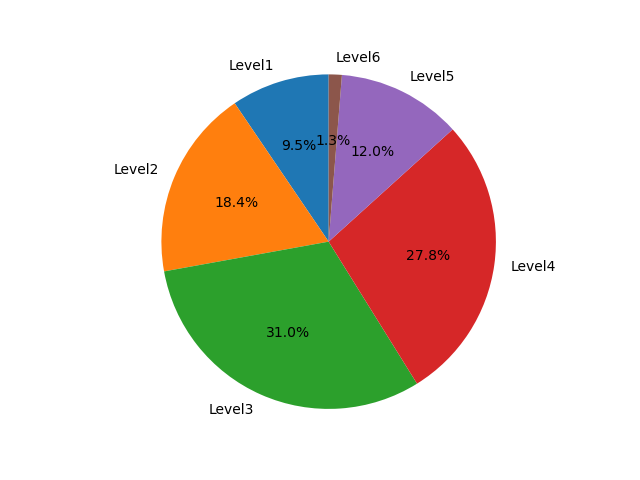

In [16]:
labels = 'Level1', 'Level2', 'Level3', 'Level4', 'Level5', 'Level6'
sizes = [15, 29, 49, 44, 19, 2]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 

plt.show()

In [19]:
regions=df.Region.unique()
for i in regions:
    print(i)

Western Europe
North America
Australia and New Zealand
Middle East and Northern Africa
Latin America and Caribbean
Southeastern Asia
Central and Eastern Europe
Eastern Asia
Sub-Saharan Africa
Southern Asia


In [26]:
region_counts= df['Region'].value_counts()
print(region_counts)

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


<IPython.core.display.Javascript object>


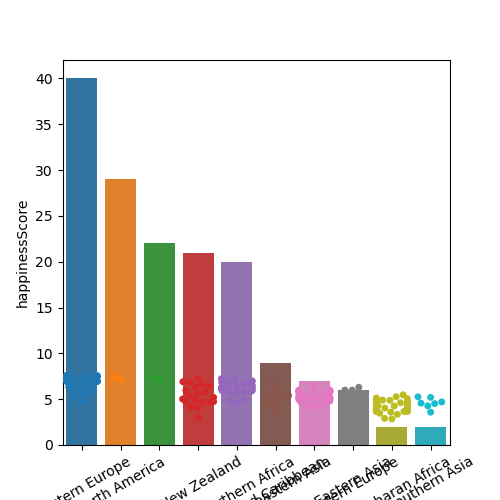

In [27]:
region_values=region_counts.values
region_index=region_counts.index

plt.figure(figsize=(5,5))
sns.barplot(x=region_index,y=region_values)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Values')
plt.show()

We can see that most of the countries in my dataset are from Sub-Saharan Africa, while there are only two countries from North America and Australia and New Zealand.


<IPython.core.display.Javascript object>


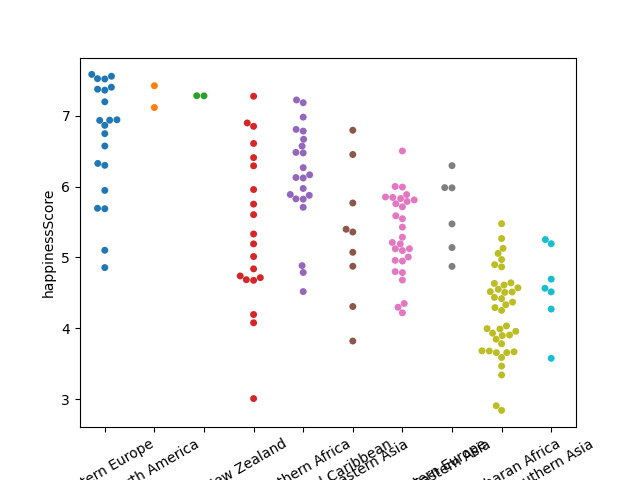

In [31]:
sns.swarmplot(x="Region", y="happinessScore",  data=df)
plt.xticks(rotation=30)
plt.show()


<IPython.core.display.Javascript object>


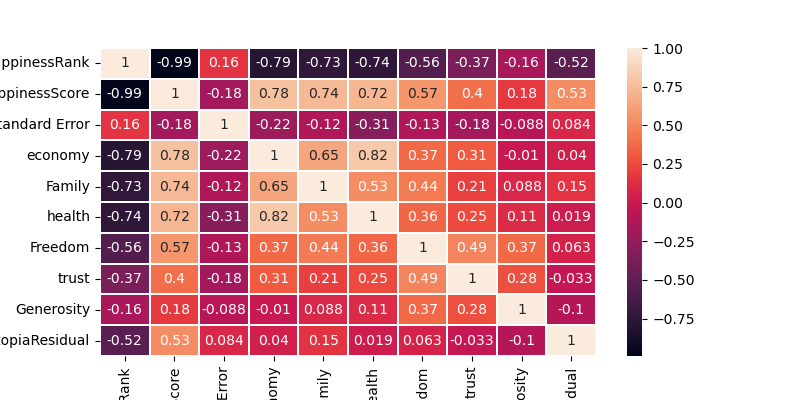

In [165]:
# correlation
plt.figure(figsize=(8,4)) 
sns.heatmap(df.corr(),annot=True,linewidth=.2)
plt.show()


checking the influence of Economy (GDP per Capita) on the Happiness Score.

In [38]:
dataA= df[["economy","happinessScore"]]
dataA


,economy,happinessScore
0,1.39651,7.587
1,1.30232,7.561
2,1.32548,7.527
3,1.45900,7.522
4,1.32629,7.427
...,...,...
153,0.22208,3.465
154,0.28665,3.340
155,0.66320,3.006
156,0.01530,2.905


<IPython.core.display.Javascript object>


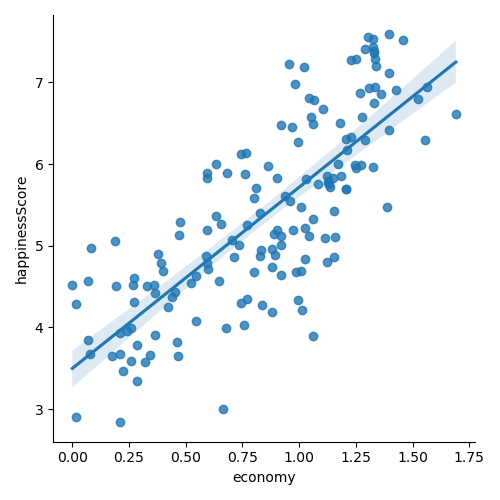

In [167]:
#checking visually the impact of economy on happiness score
sns.lmplot("economy","happinessScore",dataA)

 We can see that the connection between the economy and the happiness score is relatively linear. 

In other words, the higher the economy, the higher the happiness score. 

In [41]:
df.economy.plot(kind='hist',bins=30,figsize=(8,8))

<AxesSubplot:xlabel='economy', ylabel='Frequency'>

<IPython.core.display.Javascript object>


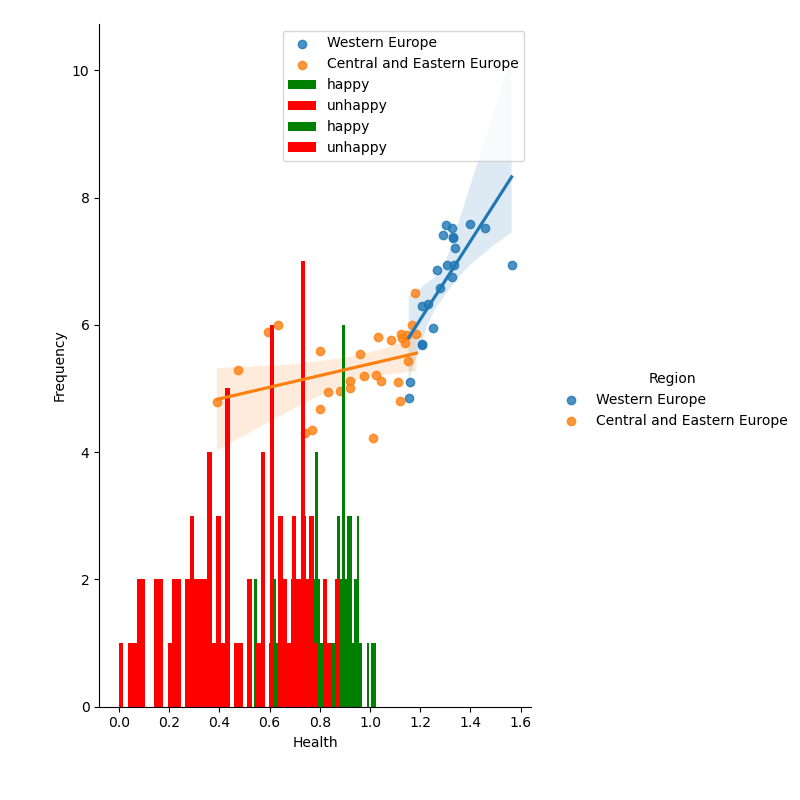

In [42]:
# Let's see the influence of economy in the different parts of Europe.

europe1 = df[df.Region=='Western Europe']
europe2 = df[df.Region=='Central and Eastern Europe']
europe = pd.concat([europe1,europe2],axis=0)
europe.head()
sns.lmplot(data=europe,x='economy',y='happinessScore',hue="Region")

In [43]:
dataB= df[["health","happinessScore"]]
dataB

,health,happinessScore
0,0.94143,7.587
1,0.94784,7.561
2,0.87464,7.527
3,0.88521,7.522
4,0.90563,7.427
...,...,...
153,0.42864,3.465
154,0.31910,3.340
155,0.72193,3.006
156,0.22396,2.905


In [45]:
df.happinessScore.mean()

5.3757341772151905

<IPython.core.display.Javascript object>


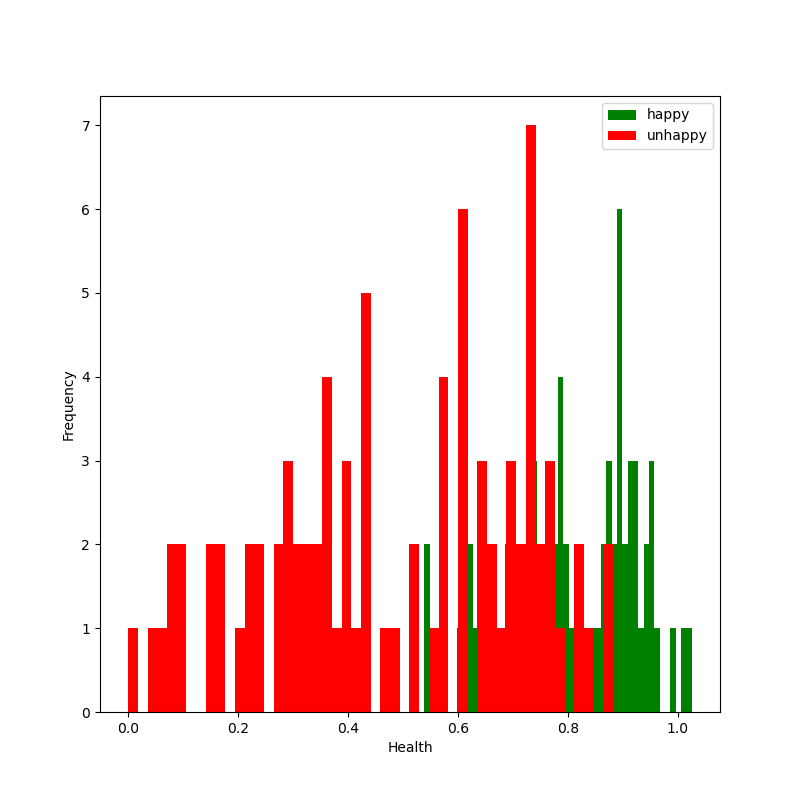

In [49]:
happy = df[df["happinessScore"] > 5.4] 
unhappy = df[df["happinessScore"] < 5.4]

happy.health.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "green", label = "happy")
unhappy.health.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "red", label = "unhappy")

plt.xlabel('Health')             
plt.legend()
plt.show()

 We can see that the vast majority of the "happy" countries having a high health rate. 

<IPython.core.display.Javascript object>


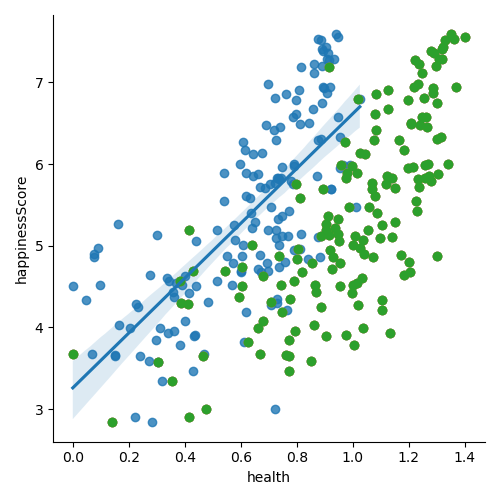

In [50]:
sns.lmplot("health","happinessScore",dataB)


Here too, as in economics, the connection between health and happiness score is quite linear. 

In [51]:
dataC= df[["Family","happinessScore"]]
dataC

,Family,happinessScore
0,1.34951,7.587
1,1.40223,7.561
2,1.36058,7.527
3,1.33095,7.522
4,1.32261,7.427
...,...,...
153,0.77370,3.465
154,0.35386,3.340
155,0.47489,3.006
156,0.41587,2.905


In [54]:
x= dataC.Family
y= dataC.happinessScore
plt.scatter(x, y, marker='o')

We can notice that the "family" feature also has an effect on the happiness score. 

When you look at the big picture you can say that as the family's ranking increases, so does the happiness score. 

In [55]:
dataD= df[["Freedom","happinessScore"]]
dataD

,Freedom,happinessScore
0,0.66557,7.587
1,0.62877,7.561
2,0.64938,7.527
3,0.66973,7.522
4,0.63297,7.427
...,...,...
153,0.59201,3.465
154,0.48450,3.340
155,0.15684,3.006
156,0.11850,2.905


<IPython.core.display.Javascript object>


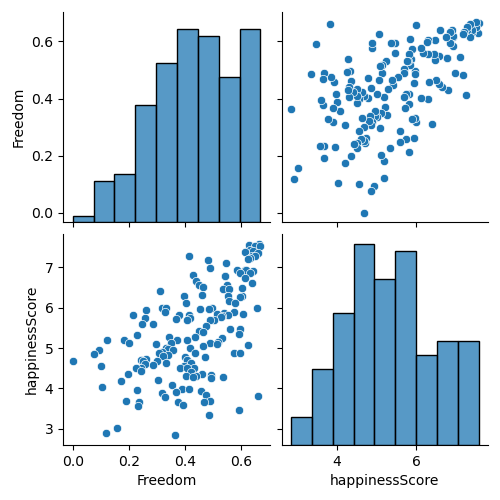

In [57]:
data4 = pd.concat([df.Freedom, df.happinessScore],axis=1)
sns.pairplot(data4)
plt.show()

<IPython.core.display.Javascript object>


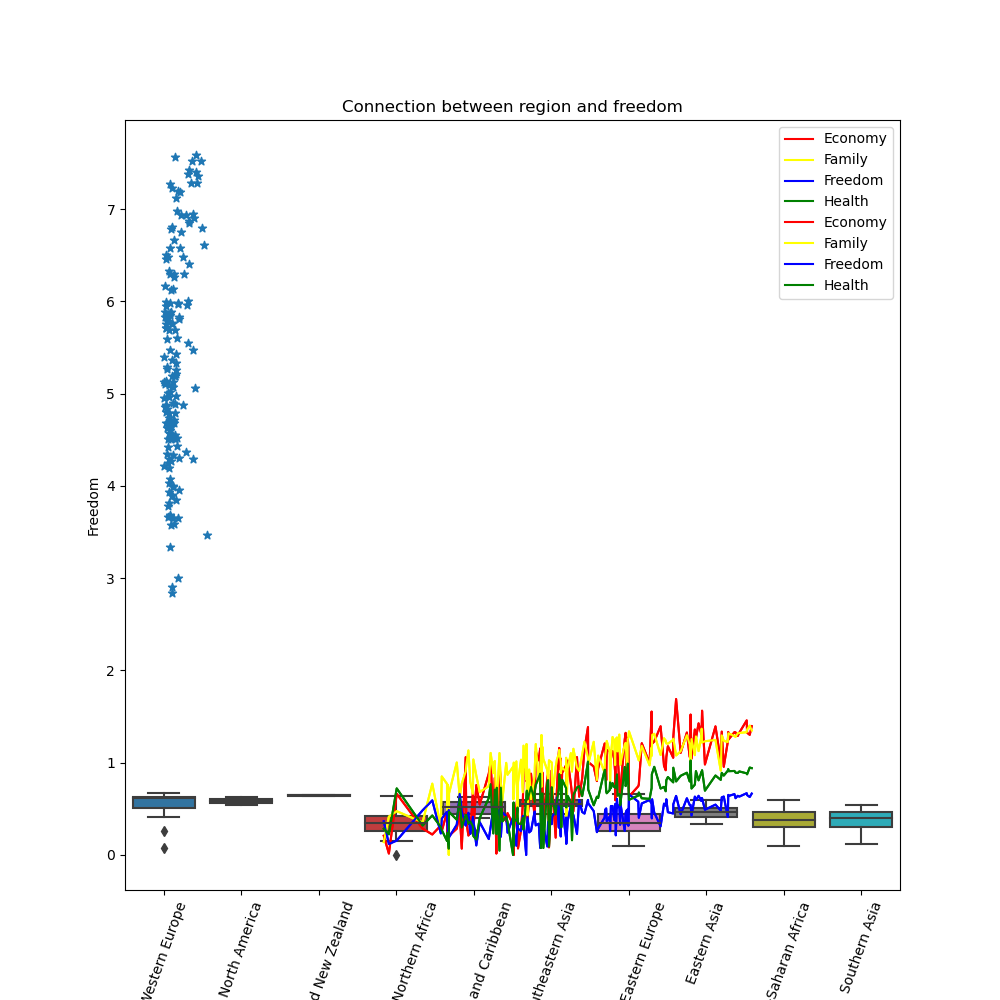

In [58]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Region", y="Freedom", data=df)
plt.xticks(rotation=70)
plt.title("Connection between region and freedom")
plt.show()

In [62]:
#checking the extent to which Perception of Corruption contributes to Happiness Score
dataE= df[["trust","happinessScore"]]
dataE

,trust,happinessScore
0,0.41978,7.587
1,0.14145,7.561
2,0.48357,7.527
3,0.36503,7.522
4,0.32957,7.427
...,...,...
153,0.55191,3.465
154,0.08010,3.340
155,0.18906,3.006
156,0.10062,2.905


<IPython.core.display.Javascript object>


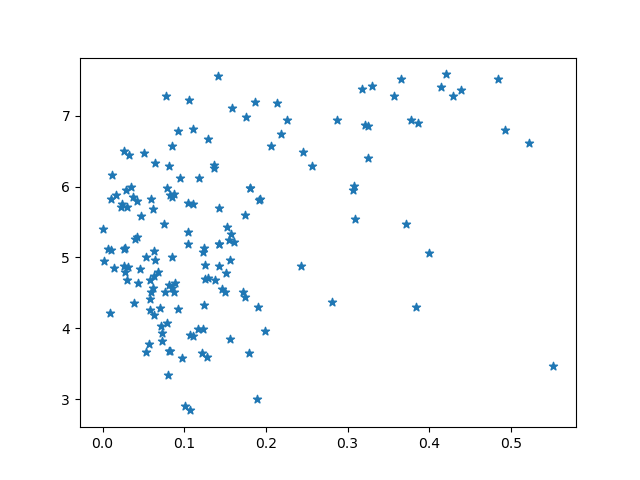

In [65]:
x= dataE.trust
y= dataE.happinessScore
plt.scatter(x, y, marker='*')

In [66]:
data_80MostHappy= df.head(80)
data_80MostHappy

,Country,Region,happinessRank,happinessScore,Standard Error,economy,Family,health,Freedom,trust,Generosity,DystopiaResidual,HappinessScore
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Level1
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Level1
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Level1
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Level1
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Level1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Turkey,Middle East and Northern Africa,76,5.332,0.03864,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528,Level3
76,Kyrgyzstan,Central and Eastern Europe,77,5.286,0.03823,0.47428,1.15115,0.65088,0.43477,0.04232,0.30030,2.23270,Level3
77,Nigeria,Sub-Saharan Africa,78,5.268,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319,Level3
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794,Level3


In [67]:
data_78LeastHappy= df.tail(78)
data_78LeastHappy

,Country,Region,happinessRank,happinessScore,Standard Error,economy,Family,health,Freedom,trust,Generosity,DystopiaResidual,HappinessScore
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709,Level3
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996,Level3
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017,Level3
83,China,Eastern Asia,84,5.140,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040,Level3
84,Zambia,Sub-Saharan Africa,85,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430,Level3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Level5
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Level5
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Level5
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Level6


<IPython.core.display.Javascript object>


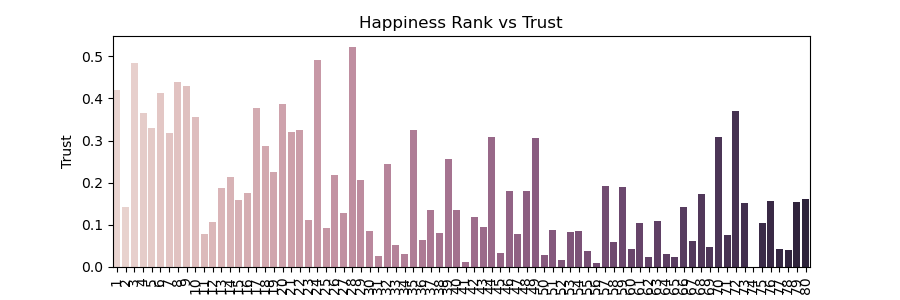

In [168]:
#plotting bar plot between happiness rank and trust
plt.figure(figsize= (9,3))
sns.barplot(x= data_80MostHappy['happinessRank'], y= df['trust'], palette= sns.cubehelix_palette(80))
plt.xticks(rotation= 90) 
plt.xlabel('Happiness Rank')
plt.ylabel('Trust')
plt.title('Happiness Rank vs Trust')
plt.show()

<IPython.core.display.Javascript object>


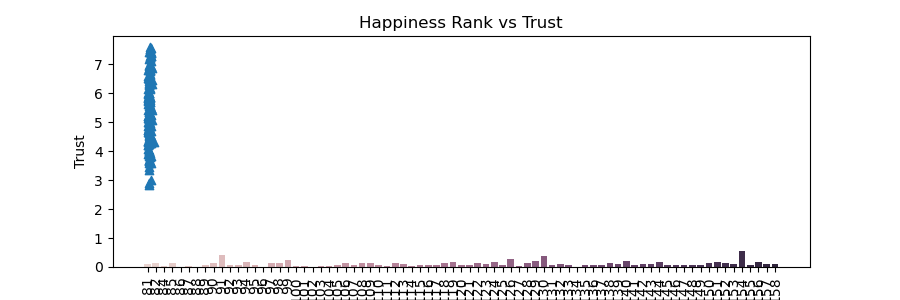

In [71]:
plt.figure(figsize= (9,3))
sns.barplot(x= data_78LeastHappy['happinessRank'], y= df['trust'], palette= sns.cubehelix_palette(78))
plt.xticks(rotation= 90) 
plt.xlabel('Happiness Rank')
plt.ylabel('Trust')
plt.title('Happiness Rank vs Trust')
plt.show()


It seems that in the "happiest countries" trust is higher than in the "unhappiest countries" (The lines are longer on the first graph).

In [72]:
# Let's see the mean score: 
m= data_80MostHappy.trust.mean()
l= data_78LeastHappy.trust.mean()

print(m)
print(l)

0.17720449999999993
0.10877294871794871


In [73]:
# Let's see the median score: 
from numpy import median
m2= data_80MostHappy.trust.median()
l2= data_78LeastHappy.trust.median()

print(m2)
print(l2)

0.142125
0.08665999999999999


In [75]:
#checking how generosity is related to happiness
dataF= df[["Generosity","happinessScore"]]
dataF

,Generosity,happinessScore
0,0.29678,7.587
1,0.43630,7.561
2,0.34139,7.527
3,0.34699,7.522
4,0.45811,7.427
...,...,...
153,0.22628,3.465
154,0.18260,3.340
155,0.47179,3.006
156,0.19727,2.905


<IPython.core.display.Javascript object>


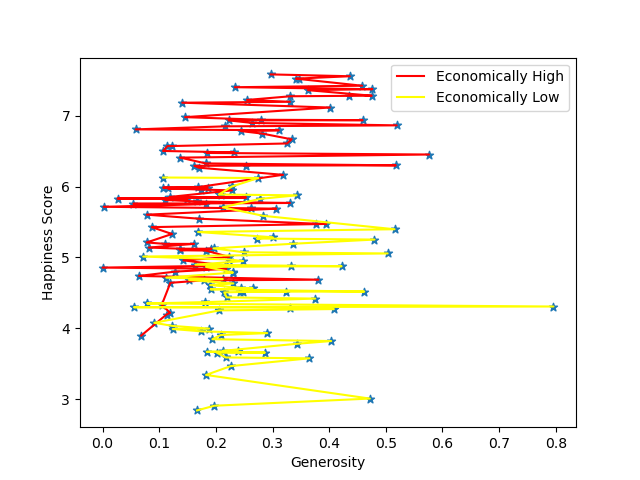

In [78]:
x= dataF.Generosity
y= dataF.happinessScore
plt.scatter(x, y, marker='*')

Let's see how Generosity is effect on Happiness in economically high and low countries.

In [81]:
x= sum(df.economy)/ len(df.economy)
x

0.8461372151898726

<IPython.core.display.Javascript object>


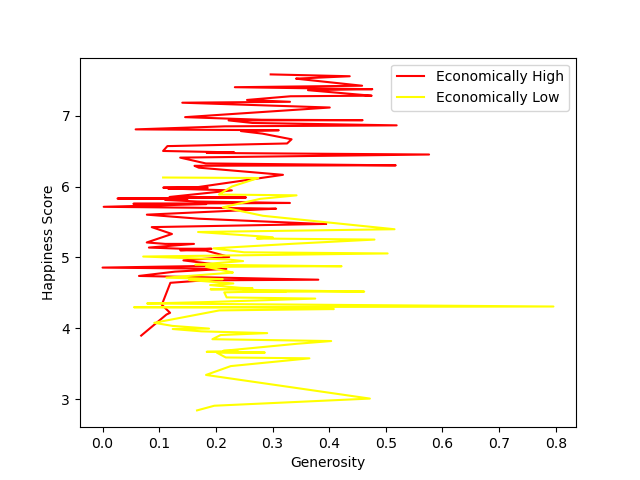

In [84]:
df["Economical_level"]= ["high" if i > x else "low" for i in df.economy]

h= df[df["Economical_level"] == "high"]
l= df[df["Economical_level"] == "low"]

plt.plot(h.Generosity, h.happinessScore, color = "red", label = "Economically High")
plt.plot(l.Generosity, l.happinessScore, color = "yellow", label = "Economically Low")
plt.xlabel('Generosity') 
plt.ylabel('Happiness Score')
plt.legend()

plt.show()


We see that precisely in countries where generosity is greatest, the economy is low. 
#We can also clearly see that the economy is a much more significant and clear factor to happiness than generosity. 

<IPython.core.display.Javascript object>


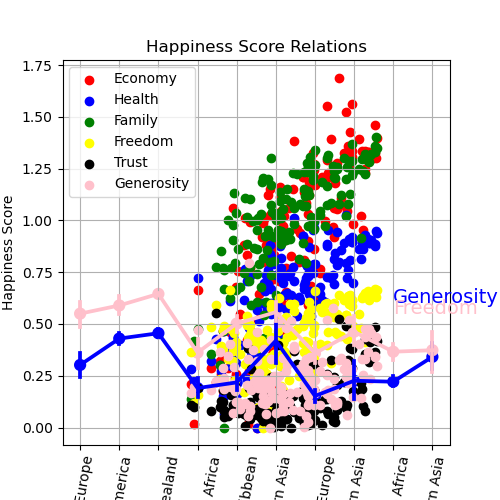

In [86]:
# Generosity and Freedom by Region
f,ax1= plt.subplots(figsize=(5,5))

sns.pointplot(x= "Region", y= "Generosity", data= df, color= "blue",alpha= 0.8)
sns.pointplot(x="Region", y="Freedom", data= df, color= "pink",alpha= 0.5)
plt.text(8,0.6,"Generosity",color= "blue",fontsize= 14)
plt.text(8,0.55,"Freedom",color= "pink",fontsize= 14)
plt.xticks(rotation= 80)
plt.ylabel("Happiness Score")
plt.grid()

plt.show()

Summary of all features and their impact

1.Economy (GDP per Capita) - red

2.Health (Life Expectancy) - blue

3.Family - green

4.Freedom - yellow

5.Trust (Government Corruption) - black

6.Generosity - pink

<IPython.core.display.Javascript object>


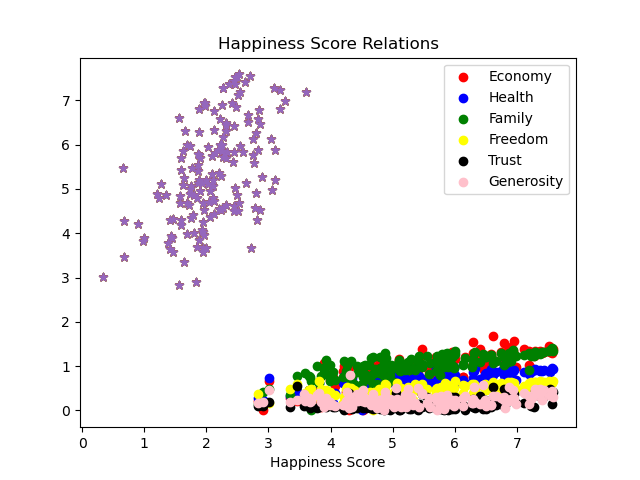

In [90]:
plt.scatter(df.happinessScore, df.economy, color = "red", label = "Economy")
plt.scatter(df.happinessScore, df.health, color = "blue", label = "Health")
plt.scatter(df.happinessScore, df.Family, color = "green", label = "Family")
plt.scatter(df.happinessScore, df.Freedom, color = "yellow", label = "Freedom")
plt.scatter(df.happinessScore, df.trust, color = "black", label = "Trust")
plt.scatter(df.happinessScore, df.Generosity, color = "pink", label = "Generosity")

plt.xlabel('Happiness Score') 
plt.legend()
plt.title('Happiness Score Relations')    

plt.show()

Dystopia Residual

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia.

The residuals, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2012-2014 life evaluations. These residuals combined with the estimate for life evaluations in Dystopia so that the combined bar will always have positive values.

In [91]:
dataG= df[["DystopiaResidual","happinessScore"]]
dataG

,DystopiaResidual,happinessScore
0,2.51738,7.587
1,2.70201,7.561
2,2.49204,7.527
3,2.46531,7.522
4,2.45176,7.427
...,...,...
153,0.67042,3.465
154,1.63328,3.340
155,0.32858,3.006
156,1.83302,2.905


<IPython.core.display.Javascript object>


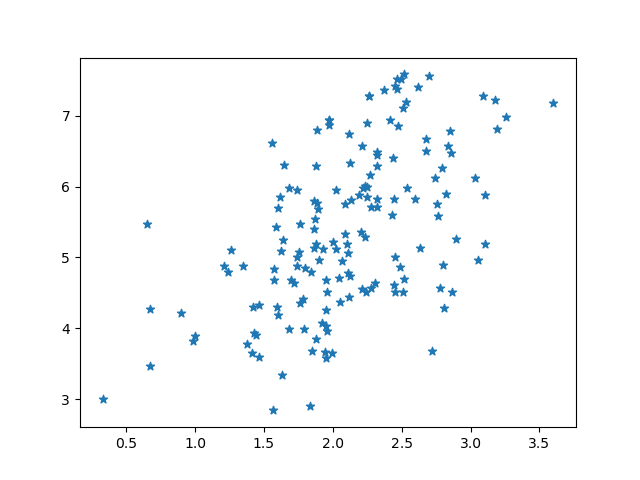

In [101]:
# The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.
x= dataG.DystopiaResidual
y= dataG.happinessScore
plt.scatter(x, y, marker='*')

<IPython.core.display.Javascript object>


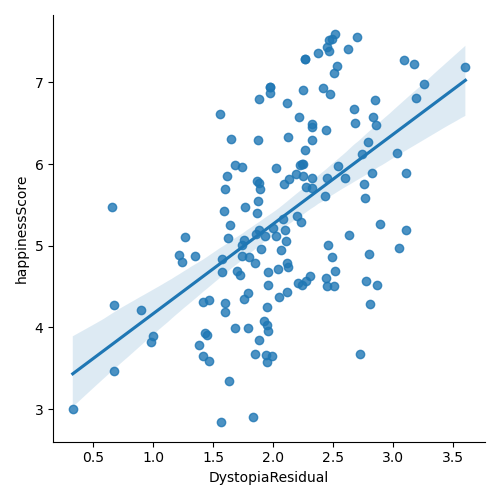

In [102]:
sns.lmplot("DystopiaResidual","happinessScore",dataG)

# Dividing our data into x and y variables

In [104]:
feature_cols = ['economy', 'health', 'Family', 'Freedom', 'trust', 'Generosity']
X = df[feature_cols]

X.head()

,economy,health,Family,Freedom,trust,Generosity
0,1.39651,0.94143,1.34951,0.66557,0.41978,0.29678
1,1.30232,0.94784,1.40223,0.62877,0.14145,0.43630
2,1.32548,0.87464,1.36058,0.64938,0.48357,0.34139
3,1.45900,0.88521,1.33095,0.66973,0.36503,0.34699
4,1.32629,0.90563,1.32261,0.63297,0.32957,0.45811


In [105]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(158, 6)


In [107]:
y= df.happinessScore

print(y.head())
print(y.tail())

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: happinessScore, dtype: float64
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: happinessScore, dtype: float64


In [108]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(158,)


# Splitting our data into training and testing

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [111]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(118, 6)
(118,)
(40, 6)
(40,)


# Finding model that will best predict the happiness score of a country

In [112]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [114]:
print(lr.intercept_)
print(lr.coef_)

1.9581762721246228
[0.87936964 1.03885731 1.20047091 1.25407467 0.80681552 0.65745671]


In [116]:
list(zip(feature_cols, lr.coef_))

[('economy', 0.879369636591821),
 ('health', 1.0388573060257982),
 ('Family', 1.2004709081555822),
 ('Freedom', 1.2540746712979964),
 ('trust', 0.8068155242569223),
 ('Generosity', 0.6574567058559431)]

In [120]:
y_pred = lr.predict(X_test)

print(y_pred)
print(y_test)
print("test:")
print(lr.score(X_test,y_test))
print("train:")
print(lr.score(X_train, y_train))

[4.77778874 6.45268507 4.61351669 3.06301906 4.95909844 5.90862756
 4.22414977 5.15434891 4.89585019 4.67880823 6.69502255 5.65704649
 5.8774688  5.79096669 6.07500941 5.99396917 4.12020656 4.8984179
 4.05723349 6.16665281 4.31578402 6.64429006 6.76735042 7.0609662
 6.29406896 5.43790637 4.90437801 4.05992832 4.35660478 3.87496992
 4.49435623 5.28106865 4.35463298 5.52956953 4.65688195 4.62418037
 3.75882228 5.51698473 5.2696685  4.38685155]
128    4.307
45     5.987
134    4.194
156    2.905
90     5.057
29     6.574
96     4.898
98     4.876
95     4.949
140    3.931
19     6.901
56     5.828
15     6.983
69     5.548
24     6.786
30     6.505
122    4.507
109    4.686
93     4.971
65     5.695
150    3.655
18     6.937
12     7.200
9      7.284
31     6.485
81     5.192
51     5.889
139    3.956
125    4.369
146    3.681
145    3.781
75     5.332
137    3.995
55     5.833
126    4.350
84     5.129
154    3.340
42     6.123
67     5.605
117    4.550
Name: happinessScore, dtype: float

In [122]:

# Mean Absolute Error
print(mean_absolute_error(y_test, y_pred))

0.4016455499083544


In [123]:
# Mean Squared Error 
print(mean_squared_error(y_test, y_pred))

0.22987311797590754


In [128]:
# Root Mean Squared Error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.4794508504277655


In [132]:
# we have seen before that the feature "DystopiaResidual" also has an effect on the happiness score.
# So maybe our model will be better with it...
# Let's check it out (and check the RMSE)!

feature_cols = ['economy', 'health', 'Family', 'Freedom', 'trust', 'Generosity', 'DystopiaResidual'] 
X = df[feature_cols]

y= df.happinessScore

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.00028394527687627497


In [134]:
print(lr.intercept_)
print(lr.coef_)

6.581911731196044e-06
[1.00014648 0.99984093 0.99991821 0.99985029 1.0000842  0.99988874
 1.00004395]


In [136]:
list(zip(feature_cols, lr.coef_))

[('economy', 1.0001464821169392),
 ('health', 0.999840926289065),
 ('Family', 0.9999182107120905),
 ('Freedom', 0.9998502903802978),
 ('trust', 1.000084203036801),
 ('Generosity', 0.9998887414297811),
 ('DystopiaResidual', 1.0000439453163572)]

In [137]:
print("test:")
print(lr.score(X_test,y_test))
print("train:")
print(lr.score(X_train, y_train))

test:
0.9999999287644473
train:
0.9999999439266545


In [138]:
# Mean Absolute Error
print(mean_absolute_error(y_test, y_pred))

0.00023964341429237867


In [139]:
# Mean Squared Error (MSE)
print(mean_squared_error(y_test, y_pred))

8.062492026034444e-08


In [140]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.00028394527687627497


 The RMSE decreased when we added "DystopiaResidual" to the model! 

The conclusion: This is a very important feature for the model!

<IPython.core.display.Javascript object>


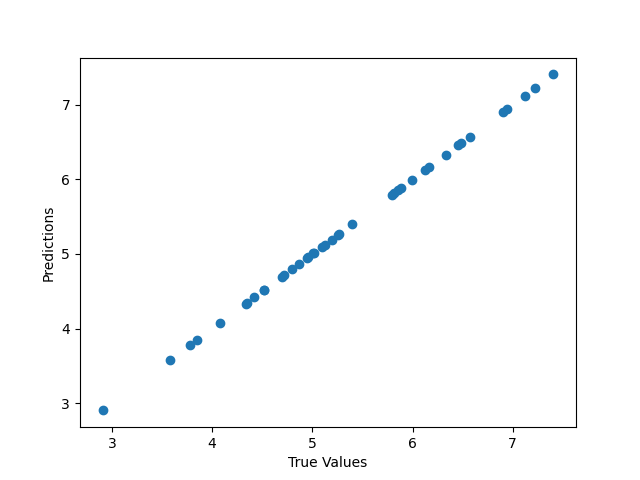

Text(0, 0.5, 'Predictions')

In [141]:
# plotting the model 

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')


## Cross Validation for linear Regression Model

In [142]:
# The high score (99.9%) I got before could be result in overfitting, what we’re actually trying to avoid! 
# This is where cross validation comes in.

K-Folds Cross Validation

In [169]:
kf= KFold(n_splits=5).split(range(25))

In [145]:
#for train_index, test_index in kf.split(X):
 #   print(“TRAIN:”, train_index, “TEST:”, test_index)
  #  X_train, X_test = X[train_index], X[test_index]
   # y_train, y_test = y[train_index], y[test_index]
    
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [148]:
scores = cross_val_score(lr, X, y, cv=10)
print(scores)
print("scores mean:", scores.mean())

[0.99999739 0.99999763 0.99999807 0.99997531 0.99999686 0.99998796
 0.99998144 0.99998668 0.99999578 0.99999947]
scores mean: 0.9999916588843147


# Conclusion: It's not overfitting

# Second model: Ridge Regression

In [150]:
rid = Ridge(alpha=0.5)
print(rid)

Ridge(alpha=0.5)


In [151]:
rid.fit(X_train, y_train)

Ridge(alpha=0.5)

In [152]:
c= rid.coef_
i= rid.intercept_

print("coaf:", c)
print("intercept:", i)

coaf: [1.03572116 0.93857983 0.97978199 0.95954209 0.84121125 0.85806644
 0.98244493]
intercept: 0.14125650433697867


In [153]:
list(zip(feature_cols, rid.coef_))

[('economy', 1.0357211606887105),
 ('health', 0.9385798256229158),
 ('Family', 0.9797819884126402),
 ('Freedom', 0.9595420909453812),
 ('trust', 0.8412112545566189),
 ('Generosity', 0.8580664397179281),
 ('DystopiaResidual', 0.9824449337902151)]

In [154]:
y_pred= rid.predict(X_test)
y_pred

array([6.58165441, 4.73591961, 7.08412387, 5.21387871, 4.41699085,
       6.85696952, 5.38368714, 7.18889129, 6.18110639, 4.97695993,
       4.92061097, 5.03140671, 4.69300665, 4.98757878, 5.82176337,
       5.13552172, 6.10448925, 5.88378919, 5.89284733, 3.79308056,
       5.81366727, 6.33698938, 3.85031127, 7.34138905, 4.40187971,
       6.45291548, 6.90296078, 5.22113728, 4.48765974, 5.04651501,
       4.51107386, 2.9432297 , 4.12557015, 6.02222671, 4.40319842,
       5.16892778, 5.29468265, 4.85263171, 6.40946441, 3.59148133])

In [155]:
print("test:")
print(rid.score(X_test,y_test))
print("train:")
print(rid.score(X_train, y_train))

test:
0.9990126070260675
train:
0.9989043806574273


Cross Validation for Ridge Model

In [156]:
scores = cross_val_score(rid, X, y, cv=10)
print(scores)
print("scores mean:", scores.mean())

[0.64578719 0.89705665 0.98595755 0.84533218 0.9850019  0.80749093
 0.81170465 0.90600796 0.91082787 0.99025569]
scores mean: 0.878542256293413


In [157]:
# search for an optimal value of the alpha parameter. 

a_range = list(range(0, 20))
a_scores = []
for a in a_range:
    rid = Ridge(alpha=a)
    scores = cross_val_score(rid, X, y, cv=10)
    a_scores.append(scores.mean())
print(a_scores)

[0.9999916588843147, 0.6193034258556053, -0.046740896528532264, -0.7647237362247449, -1.480728637945421, -2.182437485890056, -2.868835179216311, -3.541730859532085, -4.203243805352474, -4.855115531250876, -5.498599798519363, -6.134524414410551, -6.763389476673081, -7.385458950111013, -8.000834517961385, -8.609511450346458, -9.211419382860315, -9.806451353298312, -10.394484038113443, -10.97539153315589]


In [159]:
# RidgeCV implements ridge regression with built-in cross-validation of the alpha parameter.

alphas= list(range(0, 20))
reg = linear_model.RidgeCV(alphas=alphas, cv=3)
reg.fit(X_train, y_train)       

RidgeCV(alphas=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),
        cv=3)

In [160]:
reg.alpha_  

0

 I have received that the optimal value for alpha is 0. 

When a=0 The objective becomes same as simple linear regression. We’ll get the same coefficients as simple linear regression.

Conclusion: The model of linear regression is the best. 

<IPython.core.display.Javascript object>


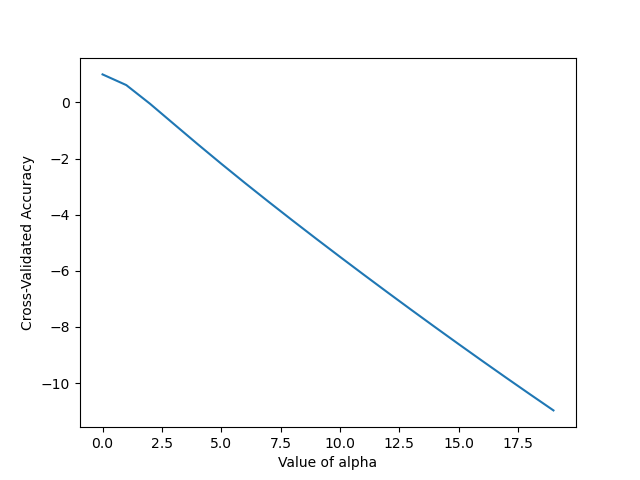

Text(0, 0.5, 'Cross-Validated Accuracy')

In [161]:
# plot the value of a for Ridge (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(a_range, a_scores)
plt.xlabel('Value of alpha')
plt.ylabel('Cross-Validated Accuracy')

 As the alpha value increases, the accuracy of the model is reduced.

# Saving model

As our linear Regression model is performing better then Ridge Regression, so our final model will be Linear Regression

In [172]:
joblib.dump(lr,'World_happiness_report.pkl')

['World_happiness_report.pkl']

# SUMMARY


The model of linear regression is the most successful for my problem.

I reached a level of accuracy of 99.9 percent!

All of the features that appear in my DataSet affect the happiness score in a rising connection, and probably linear.